<a href="https://colab.research.google.com/github/Palashhh2/Coding-Raja-Technologies-Internship/blob/main/sentiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing some important libraries

In [3]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# Load dataset
df = pd.read_csv('/content/Reviews.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [5]:
# Display summary statistics
print(df.describe())

              Id  HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count  6263.0000           6263.000000             6263.000000  6263.000000   
mean   3132.0000              1.591410                2.065624     4.178030   
std    1808.1167              5.411248                6.075171     1.317674   
min       1.0000              0.000000                0.000000     1.000000   
25%    1566.5000              0.000000                0.000000     4.000000   
50%    3132.0000              0.000000                1.000000     5.000000   
75%    4697.5000              2.000000                2.000000     5.000000   
max    6263.0000            187.000000              216.000000     5.000000   

               Time  
count  6.263000e+03  
mean   1.295220e+09  
std    4.770384e+07  
min    9.617184e+08  
25%    1.271549e+09  
50%    1.309651e+09  
75%    1.330560e+09  
max    1.351210e+09  


In [6]:
# Check for missing values
print(df.isnull().sum())

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      1
dtype: int64


<ipython-input-7-f83b9f03d639>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=df, palette='viridis')


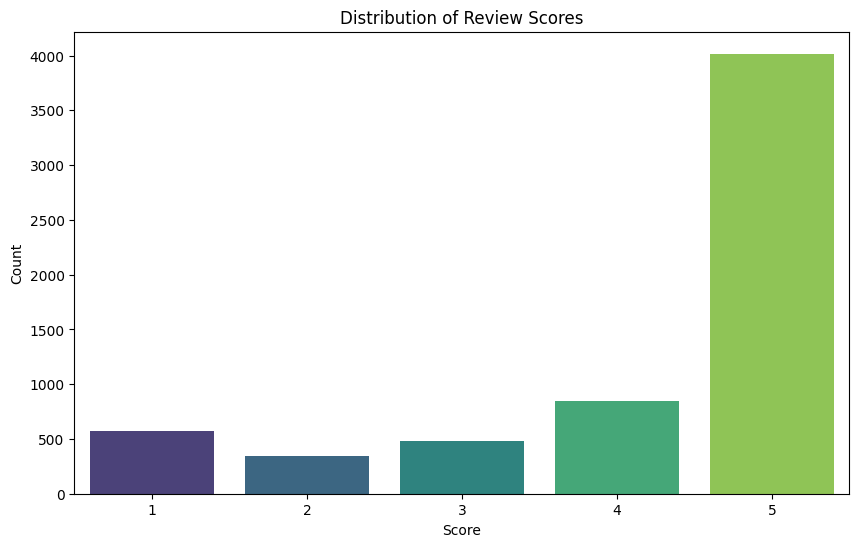

In [7]:
# Distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=df, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [8]:
# Add a column for the length of each review
df['ReviewLength'] = df['Text'].apply(lambda x: len(str(x).split()))

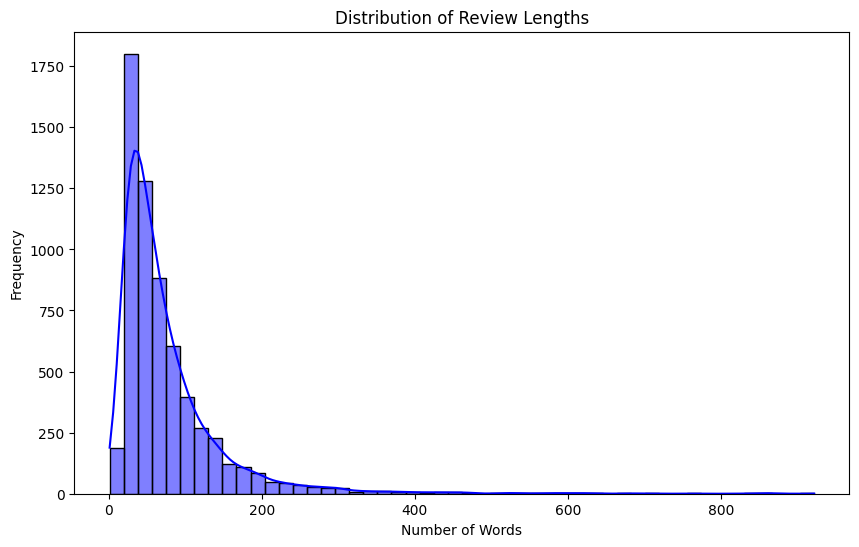

In [9]:
# Distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['ReviewLength'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Preprocessing ,removing unwanted words links links special characters and converting them it into the lower cases
df['Text'] = df['Text'].str.replace(r'http\S+|www.\S+', '', case=False) # Remove URLs
df['Text'] = df['Text'].str.replace('[^a-zA-Z]', ' ') # Remove special characters
df['Text'] = df['Text'].str.lower() # Convert to lowercase

In [11]:
# Handle missing values (NaN) in 'Text' column
df['Text'] = df['Text'].fillna('')  # Replace NaN with empty strings

In [12]:
# let binary sentiment: 1 (positive) and 0 (negative)
df = df[df['Score'] != 3]  # Remove neutral scores (3)
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)


<ipython-input-12-4890e827591d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)


<ipython-input-13-1cf9f5aab93d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


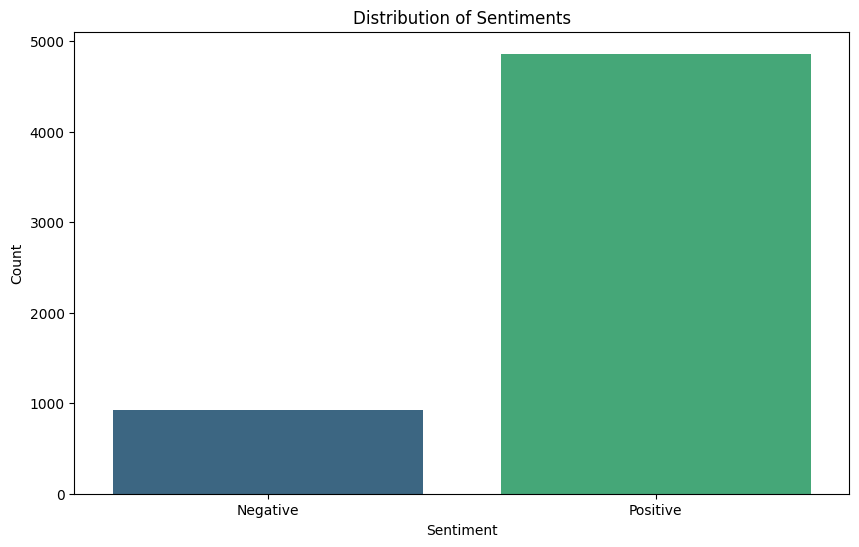

In [13]:
# Distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

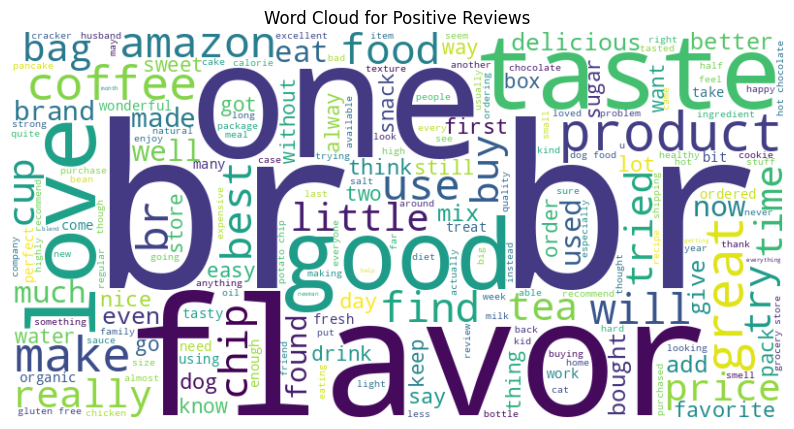

In [14]:
# Word cloud for positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 1]['Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

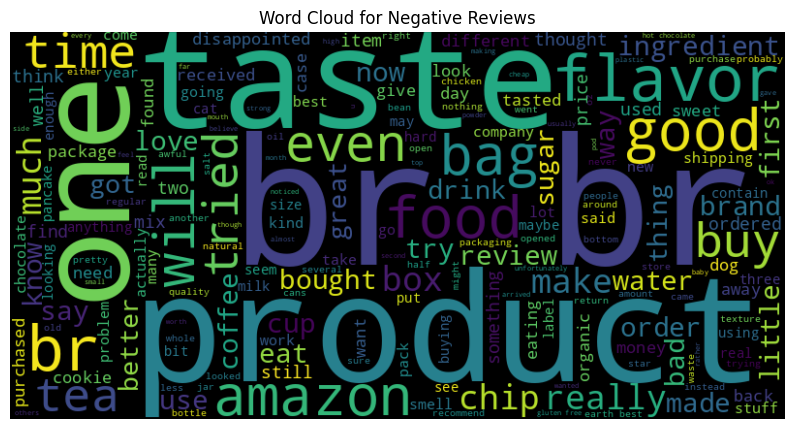

In [15]:
# Word cloud for negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 0]['Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

splitting the test data and train data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

feature extraction

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


model training / logistic regression

In [18]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

Model evaluation

In [19]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.12      0.21       190
           1       0.85      1.00      0.92       967

    accuracy                           0.85      1157
   macro avg       0.89      0.56      0.57      1157
weighted avg       0.86      0.85      0.80      1157



In [20]:
# Save the trained model and vectorizer
joblib.dump(model, 'sentiment_model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [21]:
# Load the trained model and vectorizer
model = joblib.load('sentiment_model.joblib')
vectorizer = joblib.load('vectorizer.joblib')

# Predicting sentiment for a new review

In [22]:
def preprocess_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

In [23]:
# New review to predict
review = "I love this product! It's amazing."

In [24]:
# Preprocess the review
preprocessed_review = preprocess_text(review)

# Transform the review into features
review_tfidf = vectorizer.transform([preprocessed_review])

# Predict the sentiment
predicted_sentiment = model.predict(review_tfidf)


In [25]:
# Output the prediction with emojis
sentiment_map = {0: 'Negative 😞', 1: 'Positive 😄'}
print(f"Review: {review}")
print(f"Predicted Sentiment: {sentiment_map[predicted_sentiment[0]]}")

Review: I love this product! It's amazing.
Predicted Sentiment: Positive 😄


## **Frame work to run this model on the webpage**

In [26]:
# Install ngrok
!pip install pyngrok

from flask import Flask, request, render_template_string
from pyngrok import ngrok
import joblib
import re

In [27]:
# Load the trained model and vectorizer
model = joblib.load('sentiment_model.joblib')
vectorizer = joblib.load('vectorizer.joblib')

In [28]:
def preprocess_text(text):
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub('[^a-zA-Z]', ' ')
    text = text.lower()
    return text

app = Flask(__name__)

In [29]:
@app.route('/')
def home():
    return render_template_string('''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Sentiment Analysis</title>
        <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
    </head>
    <body>
        <div class="container">
            <h1 class="mt-5">Sentiment Analysis</h1>
            <form method="post" action="/predict">
                <div class="form-group">
                    <label for="review">Enter a review:</label>
                    <textarea class="form-control" id="review" name="review" rows="3"></textarea>
                </div>
                <button type="submit" class="btn btn-primary">Predict Sentiment</button>
            </form>
            {% if review %}
                <div class="mt-4">
                    <h4>Review:</h4>
                    <p>{{ review }}</p>
                    <h4>Predicted Sentiment:</h4>
                    <p>{{ prediction }}</p>
                </div>
            {% endif %}
        </div>
    </body>
    </html>
    ''')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        review = request.form['review']
        preprocessed_review = preprocess_text(review)
        review_tfidf = vectorizer.transform([preprocessed_review])
        predicted_sentiment = model.predict(review_tfidf)
        sentiment_map = {0: 'Negative 😞', 1: 'Positive 😄'}
        result = sentiment_map[predicted_sentiment[0]]
        return render_template_string('''
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Sentiment Analysis</title>
            <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
        </head>
        <body>
            <div class="container">
                <h1 class="mt-5">Sentiment Analysis</h1>
                <form method="post" action="/predict">
                    <div class="form-group">
                        <label for="review">Enter a review:</label>
                        <textarea class="form-control" id="review" name="review" rows="3"></textarea>
                    </div>
                    <button type="submit" class="btn btn-primary">Predict Sentiment</button>
                </form>
                {% if review %}
                    <div class="mt-4">
                        <h4>Review:</h4>
                        <p>{{ review }}</p>
                        <h4>Predicted Sentiment:</h4>
                        <p>{{ prediction }}</p>
                    </div>
                {% endif %}
            </div>
        </body>
        </html>
        ''', review=review, prediction=result)

In [35]:
# Configure your authtoken
ngrok.set_auth_token("2kPg0LQmgDDICwRO0MdFCLPkONy_EJNAii7thZTEkn9yHUZ")

# Runing the app with ngrok
public_url = ngrok.connect(5000)
print('Public URL:', public_url)
app.run(port=5000)

Public URL: NgrokTunnel: "https://2ff6-34-172-159-99.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Aug/2024 08:08:06] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [09/Aug/2024 08:08:07] "GET /favicon.ico HTTP/1.1" 404 -
ERROR:__main__:Exception on /predict [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(